# Lab 1 : ECE 8410 : Computer Vision

### Aniruddha Das 201715695

## Importing Libraries

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

from random import seed
from random import random

## Importing Test Image

(-0.5, 999.5, 599.5, -0.5)

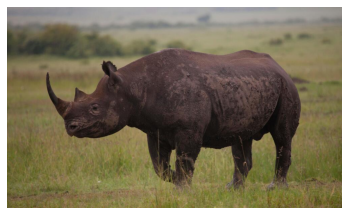

In [2]:
img = cv2.imread('TestImg.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

## Q1: Discrete Fourier Transform Calculation

#### Extracting Signal (first row of grayscale version of image selected as signal)  

In [3]:
ibw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sig = ibw[0]

#### Plotting Signal

<Figure size 2160x1440 with 0 Axes>

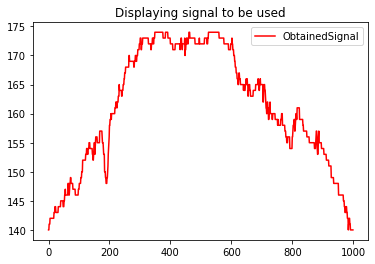

<Figure size 2160x1440 with 0 Axes>

In [4]:
L = range(len(sig))
plt.plot(L, sig, 'r', label="ObtainedSignal")
plt.title('Displaying signal to be used')
plt.legend(loc="upper right")
plt.figure(figsize=(30,20))

#### Defining function to calculate DFT of entered 1-D signal

##### Input: 1-D Array containing signal information

##### Output: 1-D Array containing DFT of input signal (complex numbers)

In [5]:
def DFT(x):
    N = len(x)
    Xout = []
    X = 0 + 0j
    for k in range(N):
        X = 0 + 0j
        for n in range(N):
            e = np.exp(-2j * np.pi * k * n / N)
            X = X + np.dot(e, x[n])
        Xout.append(X)
    
    Xout = np.asarray(Xout)
    return Xout

#### Defining Function to return original signal by calculating inverse DFT of the input DFT signal representation

##### Input: DFT representation of signal (1-D Array containing complex numbers)

##### Output: original signal (1-D Array containing complex numbers with imaginary components zeroed out)

In [6]:
def invsDFT(X):
    N = len(X)
    xout = []
    for n in range(N):
        x = 0
        for k in range(N):
            e = np.exp(2j * np.pi * k * n / N)
            x = x + np.dot(e, X[k])
        x = x/N
        xout.append(x)
        
    xout = np.asarray(xout)
    return xout    

#### Obtaining DFT representation of selected signal (using DHT()) and then obtaining back original signal from the DFT representation (invsDFT())

In [7]:
dft = DFT(sig)

In [8]:
sighat = invsDFT(dft)

#### Plotting Signal Obtained from Calculating DFT and Inverse DFT of Selected Signal (Real Components)

<Figure size 2160x1440 with 0 Axes>

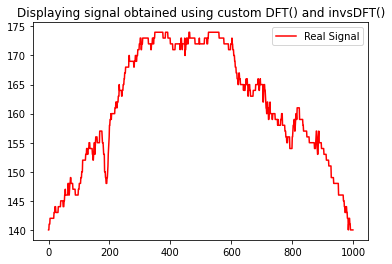

<Figure size 2160x1440 with 0 Axes>

In [9]:
L = range(len(sighat))
plt.plot(L, sighat[L].real, 'r', label="Real Signal")
plt.title('Displaying signal obtained using custom DFT() and invsDFT()')
plt.legend(loc="upper right")
plt.figure(figsize=(30,20))

#### Obtaining DFT representation of selected signal using numpy.fft.fft() and then obtaining back original signal from the DFT representation numpy.fft.ifft()

In [10]:
Xnp = np.fft.fft(sig)

In [11]:
sighatnp = np.fft.ifft(Xnp)

#### Plotting Signal Obtained from Calculating DFT and Inverse DFT of Selected Signal (Real Components) using numpy module implementations of FFT and inverse FFT

<Figure size 2160x1440 with 0 Axes>

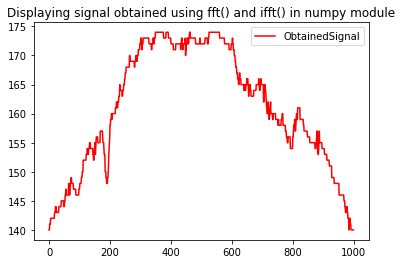

<Figure size 2160x1440 with 0 Axes>

In [12]:
L = range(len(sighatnp))
plt.plot(L, sighatnp.real, 'r', label="ObtainedSignal")
plt.title('Displaying signal obtained using fft() and ifft() in numpy module')
plt.legend(loc="upper right")
plt.figure(figsize=(30,20))

(-49.95, 1048.95, 138.29999999999995, 175.70000000000007)

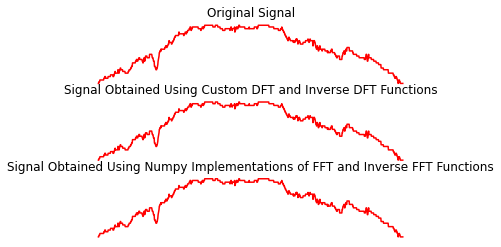

In [14]:
figure, axis = plt.subplots(3, 1)

L = range(len(sig))

axis[0].plot(L, sig, 'r', label="Obtained Signal")
axis[0].set_title("Original Signal")
axis[0].axis('off')

axis[1].plot(L, sighat[L].real, 'r', label="Obtained Signal")
axis[1].set_title("Signal Obtained Using Custom DFT and Inverse DFT Functions")
axis[1].axis('off')

axis[2].plot(L, sighatnp.real, 'r', label="Obtained Signal")
axis[2].set_title("Signal Obtained Using Numpy Implementations of FFT and Inverse FFT Functions")
axis[2].axis('off')

## Q2: Data Fitting (Scattered Data Interpolation)

#### Creating a Random Signal Consisting of Three sine Components

##### NOTE: Signal is periodic over a range of 0 to 1

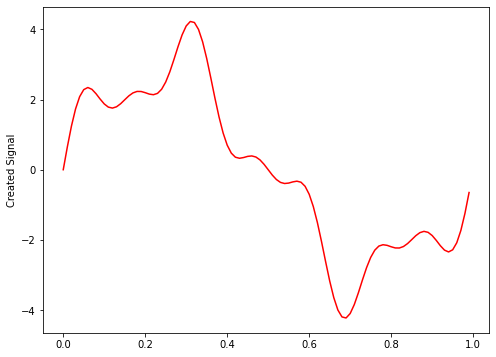

In [15]:
# Sampling Rate
sr = 100

# Sampling Interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1

# Adding sine Components
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Created Signal')

plt.show()

#### Setting seed for Random Number Generation

In [16]:
seed(1)

#### Selecting 15 Random Points Between 0 and 1

In [17]:
idx = []
L = 15
for _ in range(L):
    value = random()
    idx.append(value)

#### Obtaining, Plotting and Printing Siganl Values for Selected Points 

In [18]:
L = 15
samples = []
for i in range(len(idx)):
    sample = x[i]
    samples.append(sample)

<Figure size 2160x1440 with 0 Axes>

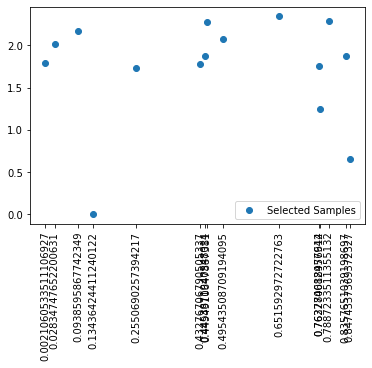

<Figure size 2160x1440 with 0 Axes>

In [19]:
plt.scatter(idx, samples, label="Selected Samples")
plt.xticks(idx,idx)
plt.xticks(rotation = 90)
plt.legend(loc="lower right")
plt.figure(figsize=(30,20))

In [20]:
sams = np.array(samples, ndmin = 2 ).T
sams

array([[0.        ],
       [0.64995109],
       [1.24301   ],
       [1.73098263],
       [2.08154121],
       [2.282616  ],
       [2.34327722],
       [2.29102039],
       [2.1660258 ],
       [2.01350931],
       [1.87561275],
       [1.78433917],
       [1.75681059],
       [1.79365925],
       [1.88074856]])

#### Sum of Selected Indices (to be used for making X matrix)

In [21]:
Si = 0
for i in idx:
    Si = Si + i

In [22]:
Si

6.986396666489642

#### Taking k=7 and Forming X Matrix

In [23]:
r1 = [15, Si, math.pow(Si, 2), math.pow(Si, 3), math.pow(Si, 4), math.pow(Si, 5), math.pow(Si, 6), math.pow(Si, 7)]
r2 = [Si, math.pow(Si, 2), math.pow(Si, 3), math.pow(Si, 4), math.pow(Si, 5), math.pow(Si, 6), math.pow(Si, 7), math.pow(Si, 8)]
r3 = [math.pow(Si, 2), math.pow(Si, 3), math.pow(Si, 4), math.pow(Si, 5), math.pow(Si, 6), math.pow(Si, 7), math.pow(Si, 8), math.pow(Si, 9)]
r4 = [math.pow(Si, 3), math.pow(Si, 4), math.pow(Si, 5), math.pow(Si, 6), math.pow(Si, 7), math.pow(Si, 8), math.pow(Si, 9), math.pow(Si, 10)]
r5 = [math.pow(Si, 4), math.pow(Si, 5), math.pow(Si, 6), math.pow(Si, 7), math.pow(Si, 8), math.pow(Si, 9), math.pow(Si, 10), math.pow(Si, 11)]
r6 = [math.pow(Si, 5), math.pow(Si, 6), math.pow(Si, 7), math.pow(Si, 8), math.pow(Si, 9), math.pow(Si, 10), math.pow(Si, 11), math.pow(Si, 12)]
r7 = [math.pow(Si, 6), math.pow(Si, 7), math.pow(Si, 8), math.pow(Si, 9), math.pow(Si, 10), math.pow(Si, 11), math.pow(Si, 12), math.pow(Si, 13)]
r8 = [math.pow(Si, 7), math.pow(Si, 8), math.pow(Si, 9), math.pow(Si, 10), math.pow(Si, 11), math.pow(Si, 12), math.pow(Si, 13), math.pow(Si, 14)]



r1 = np.asarray(r1)
r2 = np.asarray(r2)
r3 = np.asarray(r3)
r4 = np.asarray(r4)
r5 = np.asarray(r5)
r6 = np.asarray(r6)
r7 = np.asarray(r7)
r8 = np.asarray(r8)

In [24]:
X = [r1, r2, r3, r4, r5, r6, r7, r8]
X = np.asarray(X)

In [25]:
X

array([[1.50000000e+01, 6.98639667e+00, 4.88097384e+01, 3.41004194e+02,
        2.38239056e+03, 1.66443255e+04, 1.16283860e+05, 8.12405172e+05],
       [6.98639667e+00, 4.88097384e+01, 3.41004194e+02, 2.38239056e+03,
        1.66443255e+04, 1.16283860e+05, 8.12405172e+05, 5.67578478e+06],
       [4.88097384e+01, 3.41004194e+02, 2.38239056e+03, 1.66443255e+04,
        1.16283860e+05, 8.12405172e+05, 5.67578478e+06, 3.96532839e+07],
       [3.41004194e+02, 2.38239056e+03, 1.66443255e+04, 1.16283860e+05,
        8.12405172e+05, 5.67578478e+06, 3.96532839e+07, 2.77033570e+08],
       [2.38239056e+03, 1.66443255e+04, 1.16283860e+05, 8.12405172e+05,
        5.67578478e+06, 3.96532839e+07, 2.77033570e+08, 1.93546641e+09],
       [1.66443255e+04, 1.16283860e+05, 8.12405172e+05, 5.67578478e+06,
        3.96532839e+07, 2.77033570e+08, 1.93546641e+09, 1.35219361e+10],
       [1.16283860e+05, 8.12405172e+05, 5.67578478e+06, 3.96532839e+07,
        2.77033570e+08, 1.93546641e+09, 1.35219361e+10, 9.

#### Forming Y Matrix (using k=7)

In [26]:
Sy = 0
for m in samples:
    Sy = Sy + m
    
ry1 = Sy

Sy = 0
for n in range(len(samples)):
    Sy = Sy + (samples[n] * idx[n])
    
ry2 = Sy

Sy = 0
for n in range(len(samples)):
    Sy = Sy + (samples[n] * math.pow(idx[n],2))
    
ry3 = Sy

Sy = 0
for n in range(len(samples)):
    Sy = Sy + (samples[n] * math.pow(idx[n],3))
    
ry4 = Sy

Sy = 0
for n in range(len(samples)):
    Sy = Sy + (samples[n] * math.pow(idx[n],4))
    
ry5 = Sy

Sy = 0
for n in range(len(samples)):
    Sy = Sy + (samples[n] * math.pow(idx[n],5))
    
ry6 = Sy

Sy = 0
for n in range(len(samples)):
    Sy = Sy + (samples[n] * math.pow(idx[n],6))
    
ry7 = Sy

Sy = 0
for n in range(len(samples)):
    Sy = Sy + (samples[n] * math.pow(idx[n],7))
    
ry8 = Sy

In [27]:
Y = [[ry1], [ry2], [ry3], [ry4], [ry5], [ry6], [ry7], [ry8]]
Y = np.asarray(Y)

In [28]:
Y

array([[25.89310397],
       [12.11359401],
       [ 7.75563027],
       [ 5.39662528],
       [ 3.93818221],
       [ 2.96459481],
       [ 2.2787432 ],
       [ 1.77675382]])

#### Verifying X and Y Matrix Shapes

In [29]:
xs = X.shape
ys = Y.shape
print(f"X matris shape is: {xs}")
print(f"Y matrix shape is: {ys}")

X matris shape is: (8, 8)
Y matrix shape is: (8, 1)


#### Calculating and Printing Polynomial Coefficients

In [30]:
xstar = np.matmul( np.matmul( np.linalg.inv( np.matmul(X.T, X) ), X.T), Y)

In [31]:
xstar

array([[ 1.84950648e+00],
       [ 4.40614878e-01],
       [-3.30910434e-02],
       [-2.32673789e-03],
       [-2.83257720e-09],
       [-1.37341025e-04],
       [ 5.04935987e-06],
       [-1.00986664e-06]])

#### Defining Function to obtain 'y' using 'x' and Polynomial Coefficients

##### Input: 'x' and List of Polynomial Coefficients ( using format y = c_0 + c_1x + c_2(x^2) + c_3(x^3) + ... + c_k(x^k) ) 

##### Output: 'y' Calculated Using Above Mentioned Formula

In [32]:
def polycoffs(x, coeffs):
    order = len(coeffs)
    y = 0
    for o in range(order):
        y = y + (coeffs[o]*x**o)
    
    return y

#### Plotting Line Fitted to Selected Points from Signal

Text(0.5, 1.0, 'Data fitting using least squares polynomial fitting technique, with k = 7')

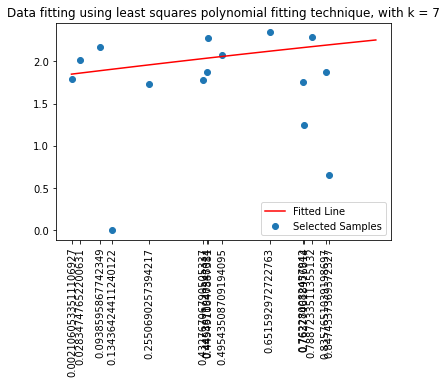

In [33]:
plt.scatter(idx, samples, label="Selected Samples")
plt.xticks(idx,idx)
plt.xticks(rotation = 90)
x = np.linspace(0, 1, 10)
plt.plot(x, polycoffs(x, xstar), 'r', label="Fitted Line")
plt.legend(loc="lower right")
plt.title('Data fitting using least squares polynomial fitting technique, with k = 7')

#### Calculating Mean Squarred Error

In [34]:
error = []
for i in range(len(samples)):
    y_pred = polycoffs(samples[i], xstar)
    error.append(np.square(y_pred - samples[i]))

In [35]:
print("Mean squared error: ", np.sum(error)/len(samples))

Mean squared error:  0.7356384294350976


## Q3: Characterizing Bilateral Filtering

#### Filtered Image Using cv2 Bilateral Filter Function

In [36]:
imgBB = cv2.bilateralFilter(img, 15, 75, 75)

(-0.5, 999.5, 599.5, -0.5)

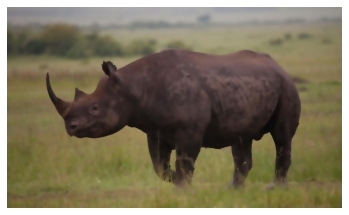

In [37]:
plt.imshow(imgBB)
plt.axis('off')

#### Filtered Image Using cv2 Gaussian Blur Filter Function

In [38]:
imgGB = cv2.GaussianBlur(img,(15,15),cv2.BORDER_DEFAULT)

(-0.5, 999.5, 599.5, -0.5)

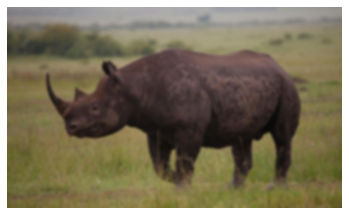

In [39]:
plt.imshow(imgGB)
plt.axis('off')

#### Selecting and Plotting First Window for Comparison

In [62]:
HT1 = 115
HB1 = 200
WL1 = 260
WR1 = 850
snipOI1 = img[HT1:HB1, WL1:WR1]
snipBB1 = imgBB[HT1:HB1, WL1:WR1]
snipGB1 = imgGB[HT1: HB1, WL1:WR1]

FFTOI1 = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(cv2.cvtColor(snipOI1, cv2.COLOR_RGB2GRAY)))))
FFTBB1 = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(cv2.cvtColor(snipBB1, cv2.COLOR_RGB2GRAY)))))
FFTGB1 = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(cv2.cvtColor(snipGB1, cv2.COLOR_RGB2GRAY)))))

(-0.5, 589.5, 84.5, -0.5)

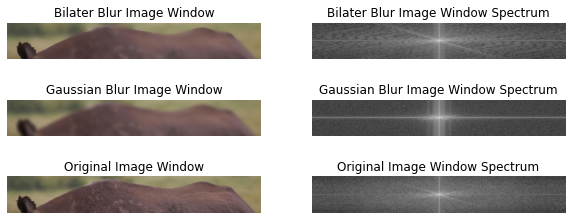

In [68]:
figure, axis = plt.subplots(3, 2, figsize=(10,4))

axis[0, 0].imshow(snipBB1)
axis[0, 0].axis('off')
axis[0, 0].set_title("Bilater Blur Image Window")

axis[0, 1].imshow(FFTBB1, cmap = 'gray')
axis[0, 1].axis('off')
axis[0, 1].set_title("Bilater Blur Image Window Spectrum")

axis[1, 0].imshow(snipGB1)
axis[1, 0].axis('off')
axis[1, 0].set_title("Gaussian Blur Image Window")

axis[1, 1].imshow(FFTGB1, cmap = 'gray')
axis[1, 1].axis('off')
axis[1, 1].set_title("Gaussian Blur Image Window Spectrum")

axis[2, 0].imshow(snipOI1)
axis[2, 0].set_title("Original Image Window")
axis[2, 0].axis('off')

axis[2, 1].imshow(FFTOI1, cmap = 'gray')
axis[2, 1].set_title("Original Image Window Spectrum")
axis[2, 1].axis('off')

#### Selecting and Plotting Second Window for Comparison

In [65]:
HT2 = 157
HB2 = 400
WL2 = 100
WR2 = 350
snipOI2 = img[HT2:HB2, WL2:WR2]
snipBB2 = imgBB[HT2:HB2, WL2:WR2]
snipGB2 = imgGB[HT2: HB2, WL2:WR2]

FFTOI2 = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(cv2.cvtColor(snipOI2, cv2.COLOR_RGB2GRAY)))))
FFTBB2 = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(cv2.cvtColor(snipBB2, cv2.COLOR_RGB2GRAY)))))
FFTGB2 = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(cv2.cvtColor(snipGB2, cv2.COLOR_RGB2GRAY)))))

(-0.5, 249.5, 242.5, -0.5)

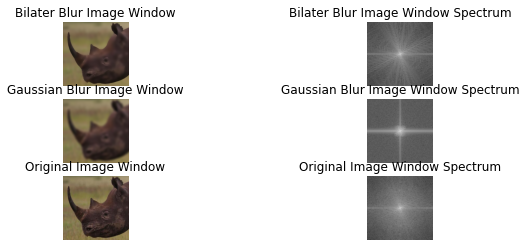

In [67]:
figure, axis = plt.subplots(3, 2, figsize=(10,4))

axis[0, 0].imshow(snipBB2)
axis[0, 0].axis('off')
axis[0, 0].set_title("Bilater Blur Image Window")

axis[0, 1].imshow(FFTBB2, cmap = 'gray')
axis[0, 1].axis('off')
axis[0, 1].set_title("Bilater Blur Image Window Spectrum")

axis[1, 0].imshow(snipGB2)
axis[1, 0].axis('off')
axis[1, 0].set_title("Gaussian Blur Image Window")

axis[1, 1].imshow(FFTGB2, cmap = 'gray')
axis[1, 1].axis('off')
axis[1, 1].set_title("Gaussian Blur Image Window Spectrum")

axis[2, 0].imshow(snipOI2)
axis[2, 0].set_title("Original Image Window")
axis[2, 0].axis('off')

axis[2, 1].imshow(FFTOI2, cmap = 'gray')
axis[2, 1].set_title("Original Image Window Spectrum")
axis[2, 1].axis('off')

#### Selecting and Plotting Third Window for Comparison

In [69]:
HT3 = 400
HB3 = 570
WL3 = 400
WR3 = 875
snipOI3 = img[HT3:HB3, WL3:WR3]
snipBB3 = imgBB[HT3:HB3, WL3:WR3]
snipGB3 = imgGB[HT3: HB3, WL3:WR3]

FFTOI3 = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(cv2.cvtColor(snipOI3, cv2.COLOR_RGB2GRAY)))))
FFTBB3 = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(cv2.cvtColor(snipBB3, cv2.COLOR_RGB2GRAY)))))
FFTGB3 = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(cv2.cvtColor(snipGB3, cv2.COLOR_RGB2GRAY)))))

(-0.5, 474.5, 169.5, -0.5)

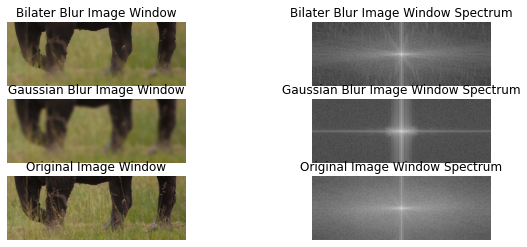

In [70]:
figure, axis = plt.subplots(3, 2, figsize=(10,4))

axis[0, 0].imshow(snipBB3)
axis[0, 0].axis('off')
axis[0, 0].set_title("Bilater Blur Image Window")

axis[0, 1].imshow(FFTBB3, cmap = 'gray')
axis[0, 1].axis('off')
axis[0, 1].set_title("Bilater Blur Image Window Spectrum")

axis[1, 0].imshow(snipGB3)
axis[1, 0].axis('off')
axis[1, 0].set_title("Gaussian Blur Image Window")

axis[1, 1].imshow(FFTGB3, cmap = 'gray')
axis[1, 1].axis('off')
axis[1, 1].set_title("Gaussian Blur Image Window Spectrum")

axis[2, 0].imshow(snipOI3)
axis[2, 0].set_title("Original Image Window")
axis[2, 0].axis('off')

axis[2, 1].imshow(FFTOI3, cmap = 'gray')
axis[2, 1].set_title("Original Image Window Spectrum")
axis[2, 1].axis('off')

Looking at the three sets of example windows above it apperas that Bilateral Filter
* Increases the intensity of white pixels in the spectrum, hence creating a sharp contrast, thereby shaper edges
* White light is less spread out and more in the form of 'rays' again crating a sharper contrast and hence sharper edges

## Scope for Improvement

Automating X and Y matrix formations from entered 'k' size in Q2